In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction, \
    combine_p_and_s_predictions

# Load in selected features data/results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
feature_dir = 'selected_features'
s_results_df = pd.read_csv(os.path.join(datadir, 's_models', feature_dir, 'all.stat.results.csv'))
p_results_df = pd.read_csv(os.path.join(datadir, 'p_models', feature_dir, 'all.stat.results.csv'))
p_df_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.2022.csv'))
s_df_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.2022.csv'))



In [3]:
all_p_stats = p_results_df['station']
p_pred_path = os.path.join(datadir,'p_models', feature_dir)
p_train_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'train')
p_test_preds_df = combine_prediction_files(all_p_stats, p_pred_path,'P', 'test')
p_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.750680,YHB
1,60001352,2.250510,2.150472,YHB
2,60001367,2.155231,2.148788,YHB
3,60001392,2.076413,1.522121,YHB
4,60001397,2.273901,2.196029,YHB
...,...,...,...,...
492,60434112,0.910973,0.921659,YDD
493,60456872,3.207673,3.307287,YDD
494,60456897,2.121661,2.353166,YDD
495,60456907,3.098341,3.198398,YDD


In [4]:
p_holdout_preds_df = combine_prediction_files(p_df_2022['station'].unique(), p_pred_path,'P', 'holdout')
p_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60475807,2.403296,2.296476,YMS
1,60480922,2.448282,2.399605,YMS
2,60481752,1.389860,1.633909,YMS
3,60483757,2.233690,2.453516,YMS
4,60483842,1.960314,2.175337,YMS
...,...,...,...,...
12,60506742,1.450397,1.573381,YNR
13,60507132,1.052885,1.286814,YNR
14,60505222,0.488491,0.547220,YNR
15,60505332,0.480386,0.810478,YNR


In [5]:
all_s_stats = s_results_df['station']
s_pred_path = os.path.join(datadir,'s_models', feature_dir)
s_train_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'train')
s_test_preds_df = combine_prediction_files(all_s_stats, s_pred_path,'S', 'test')
s_train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.797771,YHB
1,60001367,2.155231,2.033984,YHB
2,60001437,2.543478,2.548688,YHB
3,60001517,2.080642,2.131175,YHB
4,60001572,1.630087,1.717702,YHB
...,...,...,...,...
211,60469767,0.833576,0.866486,YDD
212,60469802,0.915068,0.910862,YDD
213,60469952,1.829164,2.104212,YDD
214,60469997,0.838042,0.783988,YDD


In [6]:
s_holdout_preds_df = combine_prediction_files(s_df_2022['station'].unique(), s_pred_path,'S', 'holdout')
s_holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60475807,2.403296,2.210731,YTP
1,60476287,1.403085,1.159601,YTP
2,60480912,1.756739,1.590256,YTP
3,60482602,2.059862,1.871713,YTP
4,60483757,2.233690,2.172119,YTP
...,...,...,...,...
6,60506317,1.286518,1.308663,YNR
7,60506367,0.746196,1.008110,YNR
8,60506652,0.838678,0.879211,YNR
9,60506702,0.954297,1.122642,YNR


In [7]:
p_test_avg_df = compute_network_avg_prediction(p_test_preds_df)
p_holdout_avg_df = compute_network_avg_prediction(p_holdout_preds_df)

In [8]:
s_test_avg_df = compute_network_avg_prediction(s_test_preds_df)
s_holdout_avg_df = compute_network_avg_prediction(s_holdout_preds_df)

In [9]:
combined_test_df = combine_p_and_s_predictions(p_test_preds_df, s_test_preds_df)
combined_test_avg_df = compute_network_avg_prediction(combined_test_df)

Original number of predictions: 16596
Filtered number of predictions: 14832


In [10]:
combined_holdout_df = combine_p_and_s_predictions(p_holdout_preds_df, s_holdout_preds_df)
combined_holdout_avg_df = compute_network_avg_prediction(combined_holdout_df)

Original number of predictions: 2770
Filtered number of predictions: 2570


In [11]:
p_test_subset_avg = compute_network_avg_prediction(combined_test_df[combined_test_df['phase']=='P'])
p_holdout_subset_avg = compute_network_avg_prediction(combined_holdout_df[combined_holdout_df['phase']=='P'])

In [12]:
s_test_subset_avg = compute_network_avg_prediction(combined_test_df[combined_test_df['phase']=='S'])
s_holdout_subset_avg = compute_network_avg_prediction(combined_holdout_df[combined_holdout_df['phase']=='S'])

# Load in all features results

In [13]:
feature_dir = 'all_features'
s_results_allfeat_df = pd.read_csv(os.path.join(datadir, 's_models', feature_dir, 'all.stat.results.csv'))
p_results_allfeat_df = pd.read_csv(os.path.join(datadir, 'p_models', feature_dir, 'all.stat.results.csv'))
p_df_allfeat_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.2022.csv'))
s_df_allfeat_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.2022.csv'))

all_p_allfeat_stats = p_results_allfeat_df['station']
p_pred_allfeat_path = os.path.join(datadir,'p_models', feature_dir)
p_train_allfeat_preds_df = combine_prediction_files(all_p_allfeat_stats, p_pred_allfeat_path,'P', 'train')
p_test_allfeat_preds_df = combine_prediction_files(all_p_allfeat_stats, p_pred_allfeat_path,'P', 'test')
p_holdout_allfeat_preds_df = combine_prediction_files(p_df_allfeat_2022['station'].unique(), p_pred_allfeat_path,'P', 'holdout')

all_s_allfeat_stats = s_results_allfeat_df['station']
s_pred_allfeat_path = os.path.join(datadir,'s_models', feature_dir)
s_train_allfeat_preds_df = combine_prediction_files(all_s_allfeat_stats, s_pred_allfeat_path,'S', 'train')
s_test_allfeat_preds_df = combine_prediction_files(all_s_allfeat_stats, s_pred_allfeat_path,'S', 'test')
s_holdout_allfeat_preds_df = combine_prediction_files(s_df_allfeat_2022['station'].unique(), s_pred_allfeat_path,'S', 'holdout')

p_test_allfeat_avg_df = compute_network_avg_prediction(p_test_allfeat_preds_df)
p_holdout_allfeat_avg_df = compute_network_avg_prediction(p_holdout_allfeat_preds_df)
s_test_allfeat_avg_df = compute_network_avg_prediction(s_test_allfeat_preds_df)
s_holdout_allfeat_avg_df = compute_network_avg_prediction(s_holdout_allfeat_preds_df)


combined_test_allfeat_df = combine_p_and_s_predictions(p_test_allfeat_preds_df, s_test_allfeat_preds_df)
combined_test_allfeat_avg_df = compute_network_avg_prediction(combined_test_allfeat_df)
combined_holdout_allfeat_df = combine_p_and_s_predictions(p_holdout_allfeat_preds_df, s_holdout_allfeat_preds_df)
combined_holdout_allfeat_avg_df = compute_network_avg_prediction(combined_holdout_allfeat_df)
p_test_subset_allfeat_avg = compute_network_avg_prediction(combined_test_allfeat_df[combined_test_allfeat_df['phase']=='P'])
p_holdout_subset_allfeat_avg = compute_network_avg_prediction(combined_holdout_allfeat_df[combined_holdout_allfeat_df['phase']=='P'])
s_test_subset_allfeat_avg = compute_network_avg_prediction(combined_test_allfeat_df[combined_test_allfeat_df['phase']=='S'])
s_holdout_subset_allfeat_avg = compute_network_avg_prediction(combined_holdout_allfeat_df[combined_holdout_allfeat_df['phase']=='S'])

Original number of predictions: 16596
Filtered number of predictions: 14832
Original number of predictions: 2770
Filtered number of predictions: 2570


# Make plots

### P (all), S (all), P & S (events with P and S picks) for all features

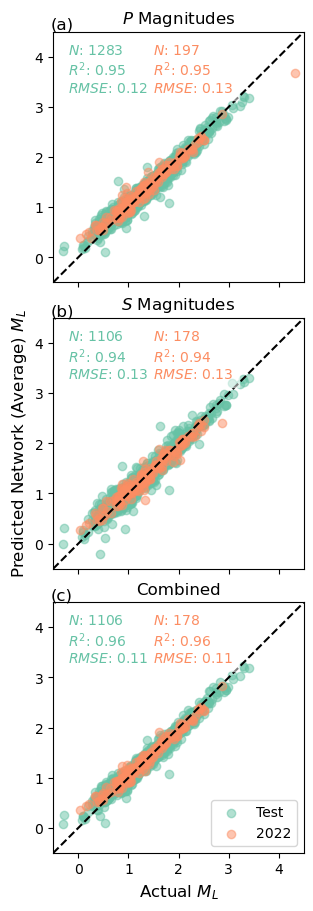

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(4, 9), constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_allfeat_avg_df, p_holdout_allfeat_avg_df],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([s_test_allfeat_avg_df, s_holdout_allfeat_avg_df],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=True,
                                    plot_ytick_labels=True,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df],
                                         ax=axes[2],
                                    title='Combined',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])
sp_labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)

### P , S, P & S network avg for events with both P and S picks (all use same subset of events) for all features

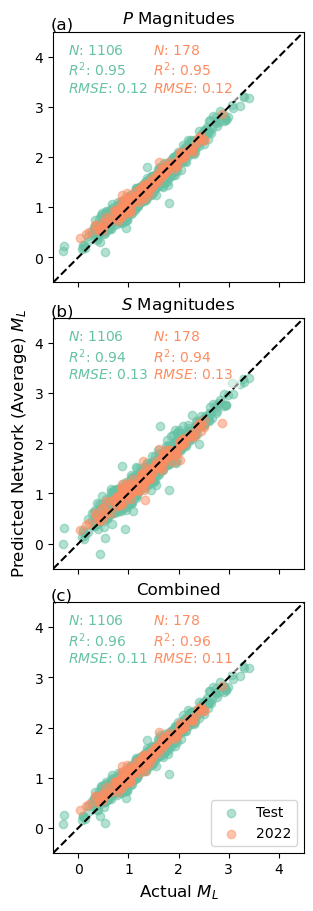

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(4, 9), constrained_layout=True)
plotting.actual_v_network_avg_prediction([p_test_subset_allfeat_avg, 
                                          p_holdout_subset_allfeat_avg],
                                    ax=axes[0],
                                    title='$\it P$ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                    plot_ylabel=False,
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([s_test_subset_allfeat_avg, 
                                          s_holdout_subset_allfeat_avg],
                                    ax=axes[1],
                                    title='$\it S $ Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=False,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    plot_ylabel=True,
                                    plot_ytick_labels=True,
                                    linestyle='--',
                                    plot_xlabel=False,
                                    plot_xtick_labels=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])

plotting.actual_v_network_avg_prediction([combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df],
                                         ax=axes[2],
                                    title='Combined',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    linestyle='--',
                                     plot_ylabel=False,
                                    text_x = [-0.2, 0.50],
                                    text_y=[-1.2, -1.2])
sp_labels = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    

# Put all features and selected features together in the same plot
### P (all), S (all), P & S (events with P and S picks)

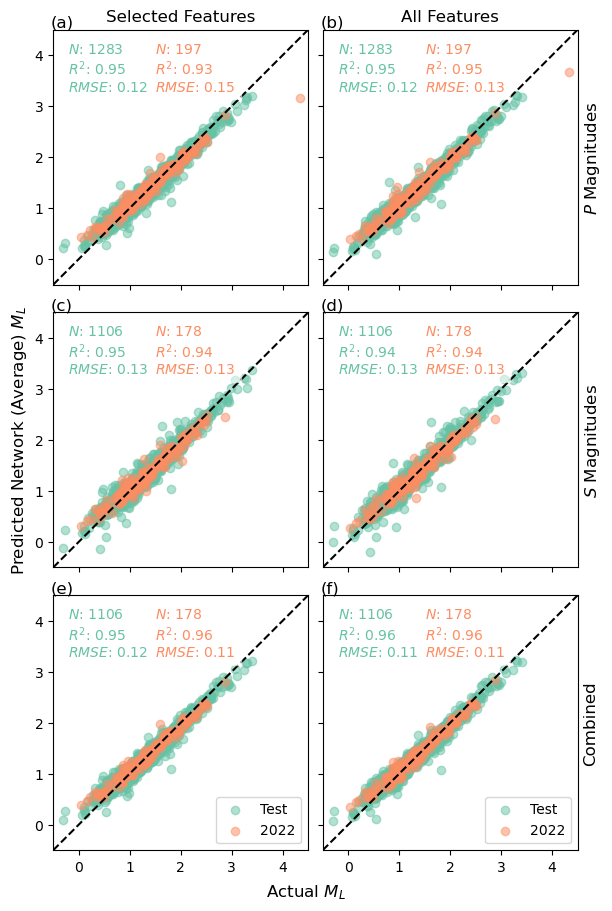

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(6, 9), constrained_layout=True)
axes = axes.flatten()

axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel('$\it P$ Magnitudes', fontsize=12)
col_labels = ['Selected Features', 'All Features']
for i, ds_list in enumerate([[p_test_avg_df, p_holdout_avg_df],
                [p_test_allfeat_avg_df, p_holdout_allfeat_avg_df]]):
    plotting.actual_v_network_avg_prediction(ds_list,
                                        ax=axes[i],
                                        title=col_labels[i],
                                        plot_lims=[-0.5, 4.5],
                                        alphas=[0.5, 0.5],
                                        legend_labels=['Test', '2022'],
                                        plot_legend=False,
                                        marker_colors=['#66c2a5', '#fc8d62'],
                                        linestyle='--',
                                        plot_ylabel=False,
                                        plot_xlabel=False,
                                        plot_ytick_labels=1-(i//1),
                                        plot_xtick_labels=False,
                                        text_x = [-0.2, 0.50],
                                        text_y=[-1.2, -1.2])

axes[3].yaxis.set_label_position("right")
axes[3].set_ylabel('$\it S$ Magnitudes', fontsize=12)
for i, ds_list in enumerate([[s_test_avg_df, s_holdout_avg_df],
                [s_test_allfeat_avg_df, s_holdout_allfeat_avg_df]]):
    plotting.actual_v_network_avg_prediction(ds_list,
                                        ax=axes[2+i],
                                        title=None,
                                        plot_lims=[-0.5, 4.5],
                                        alphas=[0.5, 0.5],
                                        legend_labels=['Test', '2022'],
                                        plot_legend=False,
                                        marker_colors=['#66c2a5', '#fc8d62'],
                                        plot_ylabel=1-(i//1),
                                        plot_ytick_labels=1-(i//1),
                                        linestyle='--',
                                        plot_xlabel=False,
                                        plot_xtick_labels=False,
                                        text_x = [-0.2, 0.50],
                                        text_y=[-1.2, -1.2])
    
axes[5].yaxis.set_label_position("right")
axes[5].set_ylabel('Combined', fontsize=12)
for i, ds_list in enumerate([[combined_test_avg_df, combined_holdout_avg_df],
                [combined_test_allfeat_avg_df, combined_holdout_allfeat_avg_df]]):
    plotting.actual_v_network_avg_prediction(ds_list,
                                            ax=axes[4+i],
                                        title=None,
                                        plot_lims=[-0.5, 4.5],
                                        alphas=[0.5, 0.5],
                                        legend_labels=['Test', '2022'],
                                        plot_legend=True,
                                        marker_colors=['#66c2a5', '#fc8d62'],
                                        linestyle='--',
                                        plot_ylabel=False,
                                        plot_ytick_labels=1-(i//1),
                                        text_x = [-0.2, 0.50],
                                        text_y=[-1.2, -1.2],
                                        plot_xlabel=False)
    
fig.supxlabel('Actual $M_L$')

sp_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axes):
    ax.text(-0.01, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)